# Enzymes and Drug Metabolism

Welcome! In this notebook, we will be exploring how genetic variation in CYP2D6 (a liver enzyme) affects how patients metabolize common drugs like codeine or antidepressants. 

By the end of this notebook, you will have familiarity with:
- Enzyme inhibition

Enzyme overview: The CYP450 family of enzymes, particularly CYP2D6, plays a critical role in metabolizing various drugs. Variations in the CYP2D6 gene (due to single nucleotide polymorphisms (SNPs)) can affect how effectively a person processes certain medications. These variations can lead to adverse drug reactions or treatment failures if not accounted for in personalized medicine.

### The Objective:

Explore the genetic variation in the CYP2D6 gene and how it affects drug metabolism, specifically in terms of:
- Metabolizer phenotypes (e.g., poor metabolizer, extensive metabolizer, ultrarapid metabolizer).
- Drug metabolism outcomes for patients using drugs like codeine, tamoxifen, or antidepressants.

Run the cell below to import any neccesary libraries for this notebook.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

The data we will be using today is from [PharmGKB](https://www.pharmgkb.org/). PharmGKB (Pharmacogenomics Knowledgebase) is a free, publicly available resource that curates information about how genetic variation affects drug response. It's used widely in research, education, and clinical pharmacogenomics.

Today we will be using their database of Variant Associations to study the association between CYP2D6 and drug metabolization. This dataset we are using contains the associations in which the variant affects a drug dose, response, metabolism, etc.

Let's get a better idea of what data we are looking at. 

Here's a short description of the **features** we are going to be focusing on:

- **Gene**: HGNC symbol for the gene involved in the association.
- **Variant/Haplotypes**: dbSNP rsID or haplotype(s) involved in the association. In some cases, an association is based on a gene phenotype group such as "poor metabolizers" or "intermediate activity". In these cases, the gene phenotype is found in this field.
- **Drug(s)**: The drug(s) involved in the association. 
- **Phenotype Category**: Options are "efficacy", "toxicity", "dosage", "metabolism/PK", "PD", "other".
- **Significance**: The significance of the association as stated by the author; options are [yes, no, not stated].
- **Alleles**: The basis for comparison in the annotation. In this field, there may be a variant, one or more haplotypes grouped together, one or more genotypes grouped together or one or more diplotypes grouped together. 
- **Metabolizer types**: This field contains the gene phenotype group, if applicable. I.e., if the association is based on a gene phenotype group such as "poor metabolizers", or if the association is based on individual genotypes that were combined into a gene phenotype group.
- **Population types**: This field indicates the type of population in which the association was studied. There are multiple options including, but not limited to, "in healthy individuals", "in children", "in women". The studied population can be further described in the "Population Phenotypes or diseases" field, in which case the "Population types" field will in with the word "with", such as "in children with".
- **Is/Is Not associated**: This field indicates whether or not an association was found.
- **Notes**: Free text field for notes added by the curator.

You can find the full descriptions [here](https://www.pharmgkb.org/page/downloadVariantAnnotationsHelp).

In [96]:
df2 = pd.read_csv('relationships/relationships.tsv', sep='\t')
df2 = df2.loc[df2['Entity1_name'] == 'CYP2D6']
df2

,Entity1_id,Entity1_name,Entity1_type,Entity2_id,Entity2_name,Entity2_type,Evidence,Association,PK,PD,PMIDs
19378,PA128,CYP2D6,Gene,PA10026,aripiprazole,Chemical,"ClinicalAnnotation,GuidelineAnnotation,LabelAn...",ambiguous,NaN,NaN,17828532;17965519;21739267;24232129;25868121;2...
19379,PA128,CYP2D6,Gene,PA10035,bromazepam,Chemical,Pathway,associated,NaN,NaN,NaN
19380,PA128,CYP2D6,Gene,PA10066,duloxetine,Chemical,"GuidelineAnnotation,LabelAnnotation,MultilinkA...",ambiguous,NaN,NaN,17380590;17713974;23545896;25969720;30207201;3...
19381,PA128,CYP2D6,Gene,PA10074,escitalopram,Chemical,"ClinicalAnnotation,DataAnnotation,GuidelineAnn...",ambiguous,NaN,PD,18070221;20350136;21926427;23545896;24302953;2...
19382,PA128,CYP2D6,Gene,PA10268,flupenthixol,Chemical,GuidelineAnnotation,associated,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19680,PA128,CYP2D6,Gene,PA452610,sparteine,Chemical,"ClinicalAnnotation,MultilinkAnnotation,Variant...",associated,NaN,NaN,10471060;15618746;17001296;17460029;1844820;18...
19681,PA128,CYP2D6,Gene,PA452616,debrisoquine,Chemical,"ClinicalAnnotation,MultilinkAnnotation,Variant...",ambiguous,NaN,NaN,10022755;10471060;11470994;11692084;11741249;1...
19682,PA128,CYP2D6,Gene,PA452618,opioids,Chemical,"ClinicalAnnotation,DataAnnotation,VariantAnnot...",associated,NaN,PD,17986163;28769582;33589790
19683,PA128,CYP2D6,Gene,PA452621,antineoplastic agents,Chemical,VariantAnnotation,ambiguous,NaN,NaN,15952058;15987423;18407954;18794105;19156902;1...


In [74]:

#might delete above
df = pd.read_csv('variantAnnotations/var_drug_ann.tsv', sep='\t')
df = df.loc[df['Gene'] == 'CYP2D6']
mini_view = df[['PMID', 'Gene', 'Variant/Haplotypes' ,'Drug(s)', 'Phenotype Category', 'Significance', 'Alleles', 'Metabolizer types', 'Population types' ,'Is/Is Not associated', 'Notes']]
mini_view.tail()

,PMID,Gene,Variant/Haplotypes,Drug(s),Phenotype Category,Significance,Alleles,Metabolizer types,Population types,Is/Is Not associated,Notes
11397,37763120,CYP2D6,rs1135840,fluoxetine,Metabolism/PK,yes,C,NaN,in healthy individuals,Associated with,"""The CYP2D6*10 haplotype, related to decreased..."
11401,37763120,CYP2D6,rs1065852,fluoxetine,Metabolism/PK,yes,A,NaN,in healthy individuals,Associated with,"""The CYP2D6*10 haplotype, related to decreased..."
11467,37307170,CYP2D6,rs28371738,alpha-hydroxymetoprolol,Metabolism/PK,yes,A,NaN,NaN,Associated with,"in a large biobank of ""“real-life” polymedicat..."
12158,34380995,CYP2D6,rs1065852,methadone,Dosage,no,A,NaN,in people with,Not associated with,This variant is referred to as CYP2D6*10 in th...
12446,22354160,CYP2D6,rs3892097,nevirapine,"Toxicity, Metabolism/PK",no,T,NaN,in people with,Not associated with,NaN


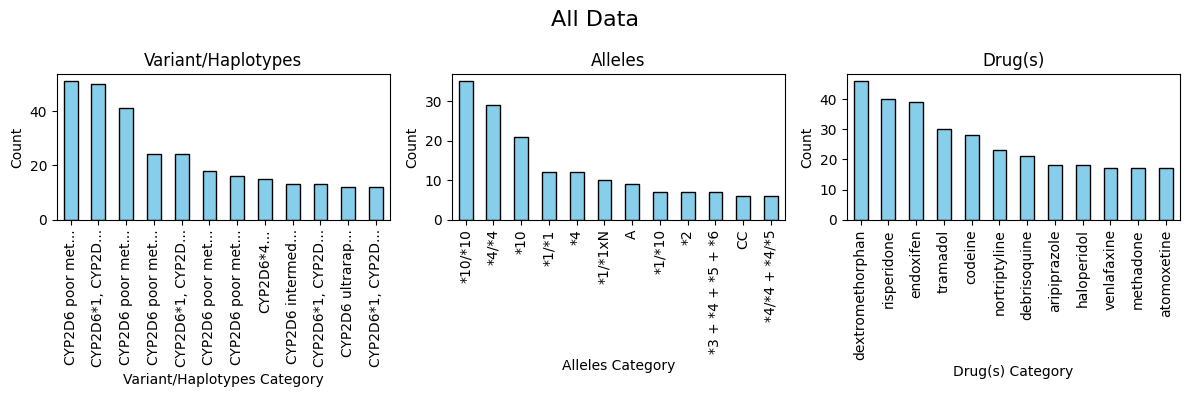

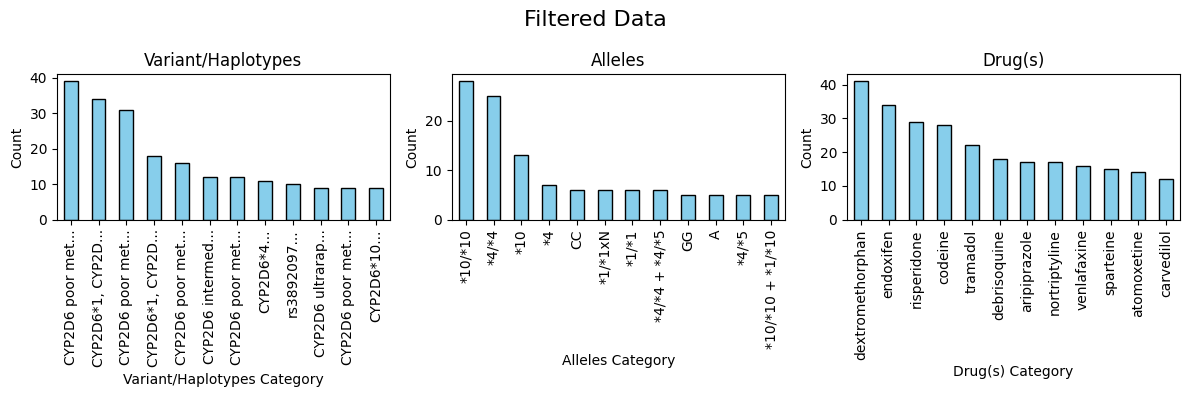

In [94]:
var_hap_counts = df['Variant/Haplotypes'].value_counts().head(12)
var_hap_counts.index = var_hap_counts.index.str.slice(0, 15) + '...'
alleles_counts = df['Alleles'].value_counts().head(12)
drugs_counts = df['Drug(s)'].value_counts().head(12)

category_counts_list = [var_hap_counts, alleles_counts, drugs_counts]
titles = ['Variant/Haplotypes', 'Alleles', 'Drug(s)']
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

def enum(category_counts_list, titles):
    for i, ax in enumerate(axes):
        category_counts_list[i].plot(kind='bar', color='skyblue', edgecolor='black', ax=ax)
        ax.set_title(titles[i])
        ax.set_ylabel('Count')
        ax.set_xlabel(titles[i] + ' Category')

enum(category_counts_list, titles)

fig.suptitle("All Data", fontsize=16)
plt.tight_layout()
plt.show()


significant = df[(df['Significance'] == 'yes') | (df['Significance'] == 'not stated')]
var_hap_counts = significant['Variant/Haplotypes'].value_counts().head(12)
var_hap_counts.index = var_hap_counts.index.str.slice(0, 15) + '...'
alleles_counts = significant['Alleles'].value_counts().head(12)
drugs_counts = significant['Drug(s)'].value_counts().head(12)

category_counts_list = [var_hap_counts, alleles_counts, drugs_counts]
titles = ['Variant/Haplotypes', 'Alleles', 'Drug(s)']
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
axes = axes.flatten()

enum(category_counts_list, titles)

fig.suptitle("Filtered Data", fontsize=16)
plt.tight_layout()
plt.show()

In [17]:
indep = 'Phenotype Category'
dep = 'Population types'
cross_tab = pd.crosstab(df[indep], df[dep])
heatmap_data = cross_tab.reset_index().melt(id_vars=indep, var_name=dep, value_name='Count')

# Plot heatmap
fig = px.density_heatmap(heatmap_data, x=indep, y=dep, z='Count', text_auto=True,
                         title='Metabolizer types vs. Phenotype Category Heatmap')

fig.show()

In [42]:
#Contains associations in which the variant affects a phenotype, with or without drug information.
df = pd.read_csv('variantAnnotations/var_pheno_ann.tsv', sep='\t')
df = df.loc[df['Gene'] == 'CYP2D6']
print(len(df))
display(df.isna().sum())
df.head(1)

662


Variant Annotation ID                               0
Variant/Haplotypes                                  0
Gene                                                0
Drug(s)                                            20
PMID                                                0
Phenotype Category                                  1
Significance                                        0
Notes                                              60
Sentence                                            0
Alleles                                           147
Specialty Population                              626
Metabolizer types                                 456
isPlural                                            0
Is/Is Not associated                                0
Direction of effect                               169
Side effect/efficacy/other                        406
Phenotype                                           0
Multiple phenotypes And/or                        413
When treated with/exposed to

,Variant Annotation ID,Variant/Haplotypes,Gene,Drug(s),PMID,Phenotype Category,Significance,Notes,Sentence,Alleles,...,Side effect/efficacy/other,Phenotype,Multiple phenotypes And/or,When treated with/exposed to/when assayed with,Multiple drugs And/or,Population types,Population Phenotypes or diseases,Multiple phenotypes or diseases And/or,Comparison Allele(s) or Genotype(s),Comparison Metabolizer types
9,1453086780,CYP2D6 ultrarapid metabolizer,CYP2D6,"aripiprazole, risperidone",40130908,Efficacy,no,"""Among risperidone users, we observed no assoc...",CYP2D6 ultrarapid metabolizer is not associate...,NaN,...,likelihood of,Other:Medication adherence,NaN,when treated with,NaN,in people with,"Other:Schizophrenia, Other:Schizoaffective dis...",or,NaN,normal metabolizer


- Analyze variant data from PharmGKB.
- Predict impact of different genotypes (e.g., poor vs ultrarapid metabolizers).
- Link to adverse drug reactions or treatment failure.
- Visualize allele frequencies across populations.

Questions:

Question:
In the case of CYP2D6, a key enzyme involved in drug metabolism, how might feedback inhibition regulate its activity in response to the accumulation of certain metabolites (e.g., morphine from codeine)? Discuss the potential consequences if feedback inhibition was not properly functioning in the context of drug metabolism.

Why is it important for the body to tightly regulate the activity of enzymes like CYP2D6? How would chemical chaos impact a patient's response to drugs if CYP2D6 were overactive or underactive?

Coenzymes play an important role in enzyme activity. For enzymes like CYP2D6, which metabolize various drugs, what role do you think organic coenzymes (such as vitamins) might play in modulating enzyme activity? Provide a specific example, if possible, of a coenzyme that might influence CYP2D6 function and its ability to metabolize drugs like tamoxifen or codeine.

As with all enzymes, CYP2D6 activity can be influenced by environmental factors such as temperature and pH. In the context of drug metabolism, how might a change in pH or temperature (such as a fever or a sudden temperature shift) affect the activity of CYP2D6 and, consequently, the metabolism of drugs? What would happen if CYP2D6 is not working within the optimal temperature or pH range?